<div align="center" style="background-color:#AAF0D1; padding:30px; border-radius:12px;">
  <h1 style="color:#0f172a; font-family:Georgia, serif; margin:0;">
    Laptop Price Prediction
  </h1>
</div>


<div align="center" style="background-color:#0d1117; padding:25px; border-radius:12px;">

<h1 style="color:#ffffff; font-family:Georgia, serif; margin-bottom:5px;">
Prince Kumar
</h1>

<p style="color:#c9d1d9; font-size:16px; margin-top:0;">
Machine Learning & Data Science Enthusiast
</p>

<hr style="width:60%; border:1px solid #30363d;">

<p style="color:#8b949e; font-size:14px;">
Project Developed by <strong>Prince Kumar</strong>
</p>

</div>


## 📌 Project Description

The **Laptop Price Prediction** project aims to develop a machine learning model capable of accurately estimating laptop prices based on their technical specifications and features.

The dataset includes attributes such as brand, processor type, RAM, storage configuration (HDD/SSD), screen resolution, PPI, operating system, weight, and other hardware characteristics. By analyzing these features, the model identifies patterns and relationships that influence pricing.

This project demonstrates practical implementation of:
- Data preprocessing and feature engineering
- Handling categorical and numerical variables
- Regression modeling using ensemble techniques
- Model evaluation using R² Score and MAE
- Model interpretability using SHAP analysis

The final model is designed to generalize well on unseen data while maintaining high predictive accuracy.


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:17px">

<h3 align="left"><font color=brown>📊 Table of Contents:</font></h3><br>


1. <b>📚 Importing Libraries.</b><br>
    
    
2. <b>🧠 Basic Understanding of Data. </b><br>
 
    
3. <b>📊 Exploratory Data Analysis (EDA) and 💡 Feature Engineering.</b><br>

    
4. <b>🎯 Model Creation and Evaluation.</b><br>


5. <b> Model Intepretablity and Explainablity (SHAP)</b><br></div>


    
9. <b> 🎈 Conclusion.</b><br>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📚 Importing Libraries 📚</b></div>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧠 Basic Understanding of Data 🧠</b></div>

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop(columns='Unnamed: 0',inplace=True)

In [9]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>📊 Exploratory Data Analysis (EDA) and 💡 Feature Engineering.</b></div>

In [10]:
df['Ram']=df['Ram'].str.replace('GB','')

In [11]:
df['Weight']=df['Weight'].str.replace('kg','')

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
df['Ram'] = df['Ram'].astype('int32')

In [14]:
df['Weight'] = df['Weight'].astype('float32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


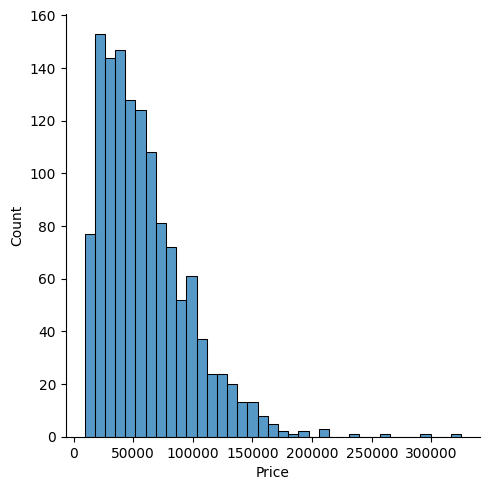

In [16]:
sns.displot(df['Price'])

<Axes: xlabel='Company'>

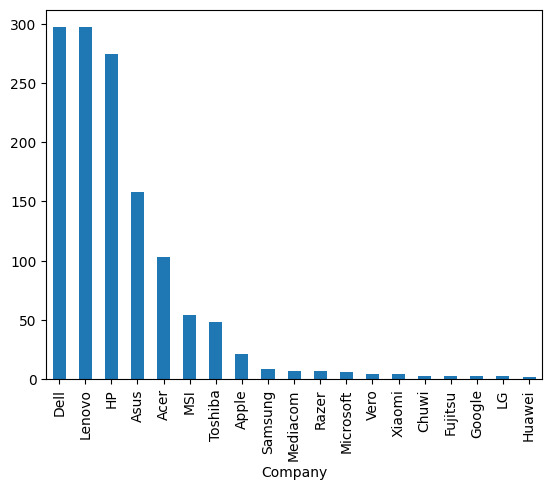

In [17]:
df["Company"].value_counts().plot(kind='bar')

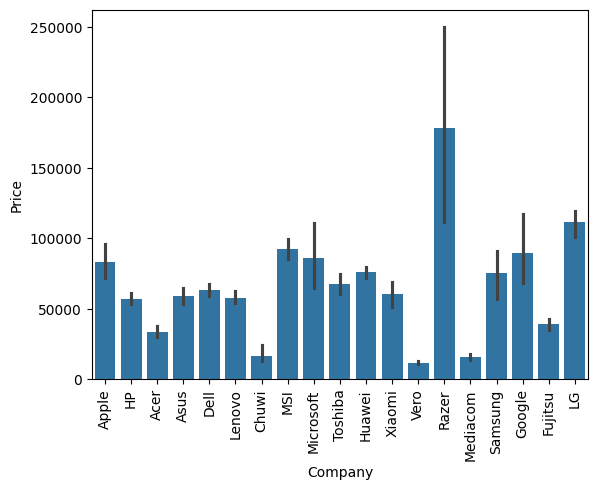

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

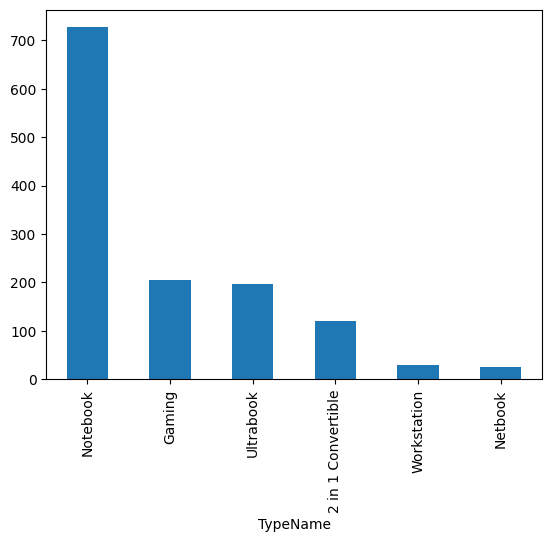

In [19]:
df['TypeName'].value_counts().plot(kind='bar')

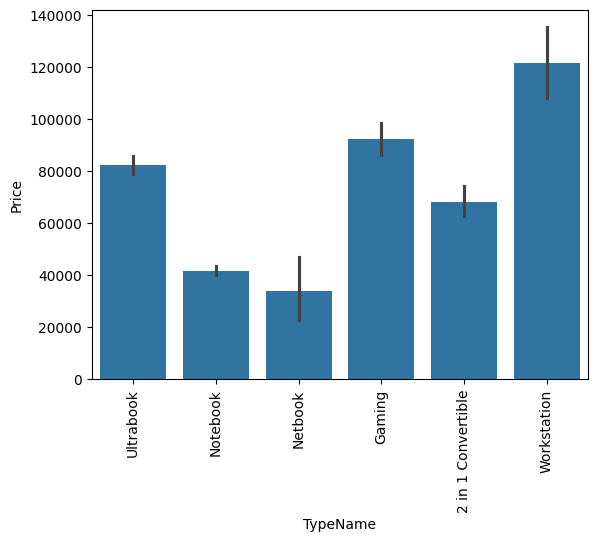

In [20]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

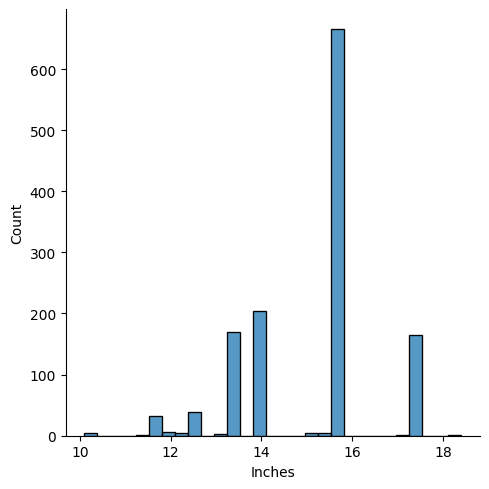

In [21]:
sns.displot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

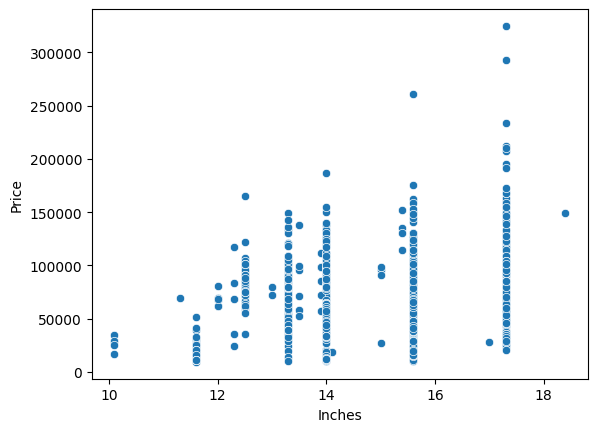

In [22]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [23]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [24]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x :1 if 'Touchscreen' in x else 0)

In [25]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
160,Asus,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.03,21471.84,0
105,HP,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.58,35111.52,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0
258,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,133146.72,0
1160,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.70,79866.72,0


<Axes: xlabel='Touchscreen'>

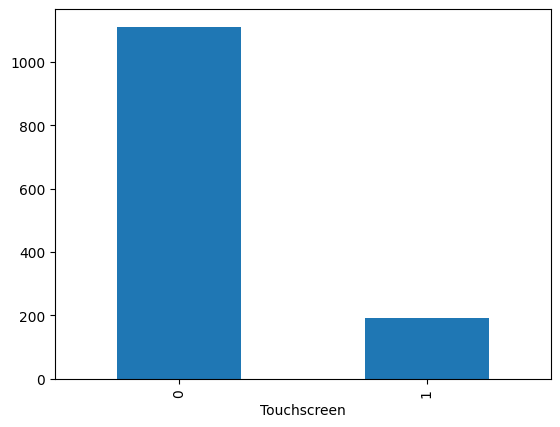

In [26]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

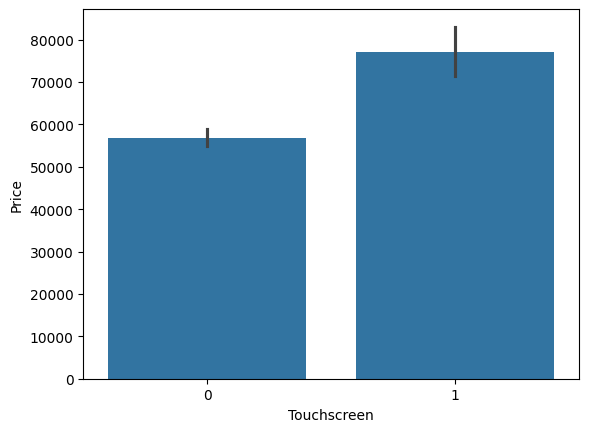

In [27]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [28]:
df['Ips']= df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

In [29]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

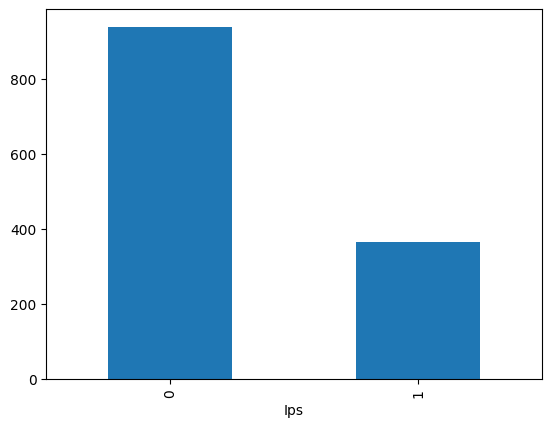

In [30]:
df['Ips'].value_counts().plot(kind= 'bar')

<Axes: xlabel='Ips', ylabel='Price'>

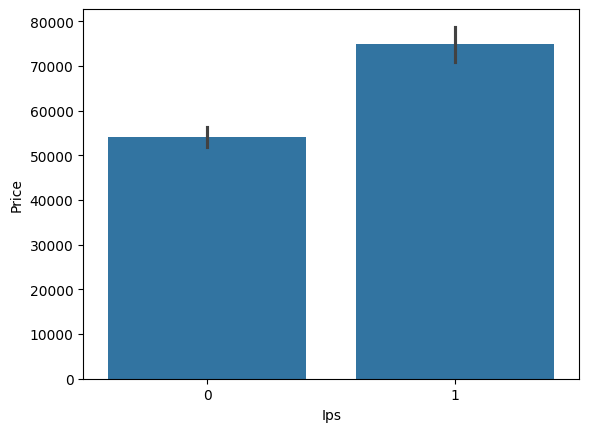

In [31]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [32]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [33]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [34]:
df['x_res']=new[0]
df['y_res']=new[1]

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [36]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [37]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [38]:
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [40]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [41]:
df['Ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype('float')

In [42]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
x_res          0.556529
y_res          0.552809
Ppi            0.473487
Name: Price, dtype: float64

In [43]:
df.drop(columns='ScreenResolution',inplace=True)

In [44]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,Ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [45]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [46]:
df['Cpu'].nunique()

118

In [47]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [48]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,Ppi,Cpu Name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


In [49]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [50]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [51]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,Ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

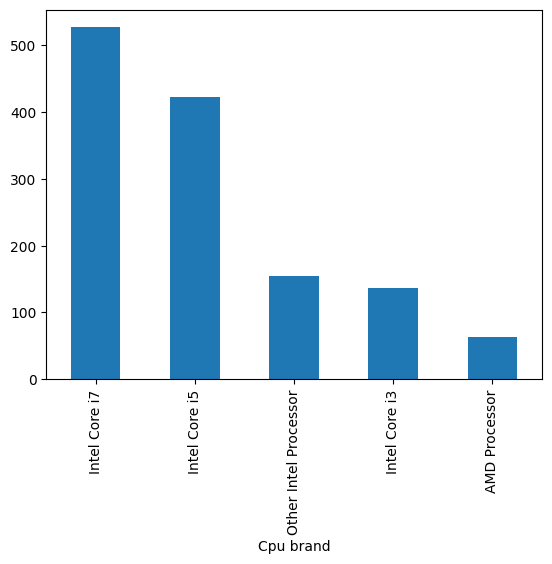

In [52]:
df['Cpu brand'].value_counts().plot(kind='bar')

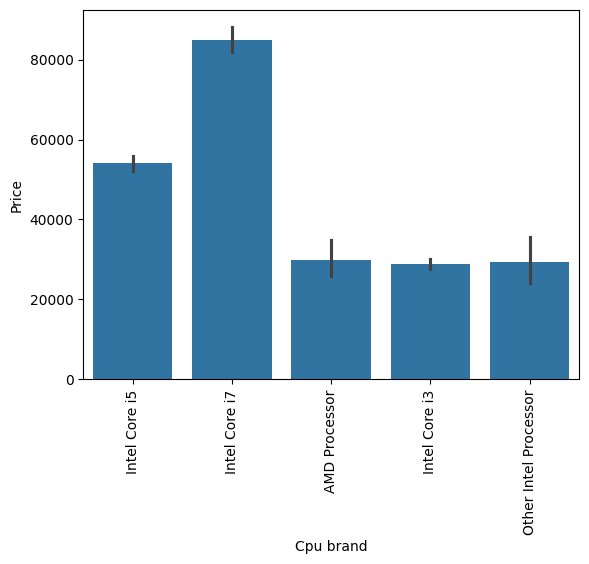

In [53]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [55]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,Ppi,Cpu brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

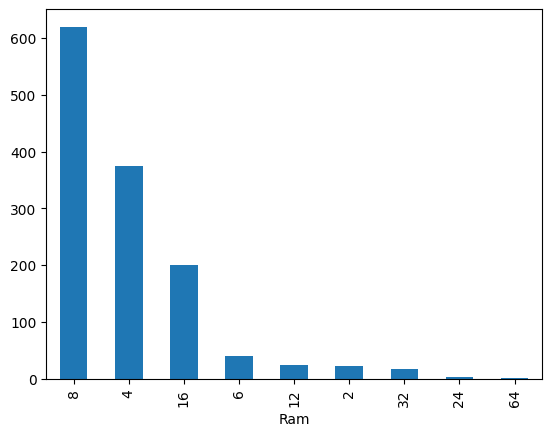

In [56]:
df['Ram'].value_counts().plot(kind='bar')

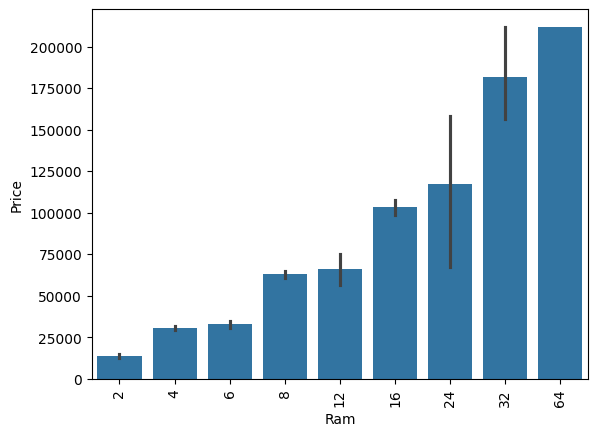

In [57]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [61]:
# 1. Basic cleaning
df["Memory"] = df["Memory"].astype(str)
df["Memory"] = df["Memory"].str.replace(r"\.0", "", regex=True)
df["Memory"] = df["Memory"].str.replace("GB", "", regex=False)
df["Memory"] = df["Memory"].str.replace("TB", "000", regex=False)

new = df["Memory"].str.split("+", n=1, expand=True)

df["first"] = new[0].str.strip()
df["second"] = new[1].fillna("0")

# 3. Detect storage type – Layer 1
df["Layer1HDD"] = df["first"].str.contains("HDD", na=False).astype(int)
df["Layer1SSD"] = df["first"].str.contains("SSD", na=False).astype(int)
df["Layer1Hybrid"] = df["first"].str.contains("Hybrid", na=False).astype(int)
df["Layer1Flash_Storage"] = df["first"].str.contains("Flash Storage", na=False).astype(int)

# 4. Detect storage type – Layer 2
df["Layer2HDD"] = df["second"].str.contains("HDD", na=False).astype(int)
df["Layer2SSD"] = df["second"].str.contains("SSD", na=False).astype(int)
df["Layer2Hybrid"] = df["second"].str.contains("Hybrid", na=False).astype(int)
df["Layer2Flash_Storage"] = df["second"].str.contains("Flash Storage", na=False).astype(int)

# 5. Extract numeric values only
df["first"] = df["first"].str.replace(r"\D", "", regex=True)
df["second"] = df["second"].str.replace(r"\D", "", regex=True)

# 6. Safe numeric conversion
df["first"] = pd.to_numeric(df["first"], errors="coerce").fillna(0).astype(int)
df["second"] = pd.to_numeric(df["second"], errors="coerce").fillna(0).astype(int)

# 7. Create final storage columns (in GB)
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (
    df["first"] * df["Layer1Flash_Storage"]
    + df["second"] * df["Layer2Flash_Storage"]
)

# 8. Drop helper columns
df.drop(
    columns=[
        "first", "second",
        "Layer1HDD", "Layer1SSD", "Layer1Hybrid", "Layer1Flash_Storage",
        "Layer2HDD", "Layer2SSD", "Layer2Hybrid", "Layer2Flash_Storage"
    ],
    inplace=True
)


In [62]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,Ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
718,Mediacom,Notebook,14.0,4,32 HDD,Intel HD Graphics 400,Windows 10,1.40,14119.20,0,1,1920,1200,161.725391,Other Intel Processor,32,0,0,0
788,Acer,Gaming,17.3,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,122490.72,0,1,1920,1080,127.335675,Intel Core i7,1000,256,0,0
987,Lenovo,Gaming,15.6,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.50,63349.92,0,1,1920,1080,141.211998,Intel Core i7,1000,128,0,0
751,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 520,Windows 10,1.84,101232.00,0,0,1920,1080,141.211998,Intel Core i5,0,256,0,0
1000,Acer,Gaming,15.6,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,67132.80,0,1,1920,1080,141.211998,Intel Core i7,1000,128,0,0


In [63]:
df.drop(columns=['Memory'],inplace=True)

In [64]:
df.corr(numeric_only=True)['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
x_res            0.556529
y_res            0.552809
Ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [65]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [66]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,Ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256


In [67]:
df['Gpu'].value_counts()


Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [68]:
print(df['Gpu'].nunique())

110


In [69]:
df['Gpu brand']= df['Gpu'].apply(lambda x : x.split()[0])

In [70]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,Ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel


In [71]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [72]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,Ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel


In [73]:
 df = df[df['Gpu brand'] != 'ARM']

In [74]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

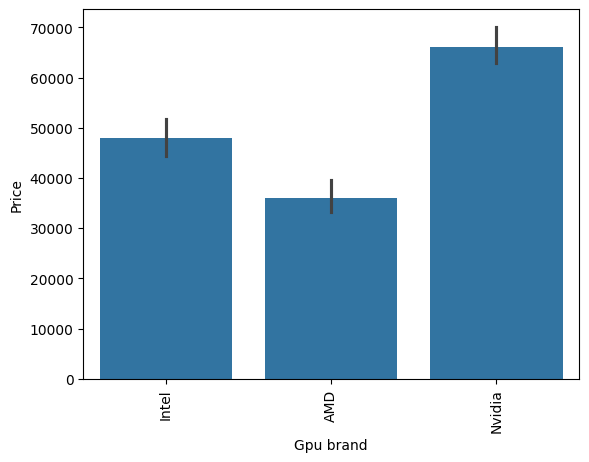

In [75]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [76]:
df.drop(columns=['Gpu'],inplace=True)

In [77]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,Ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel


In [78]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

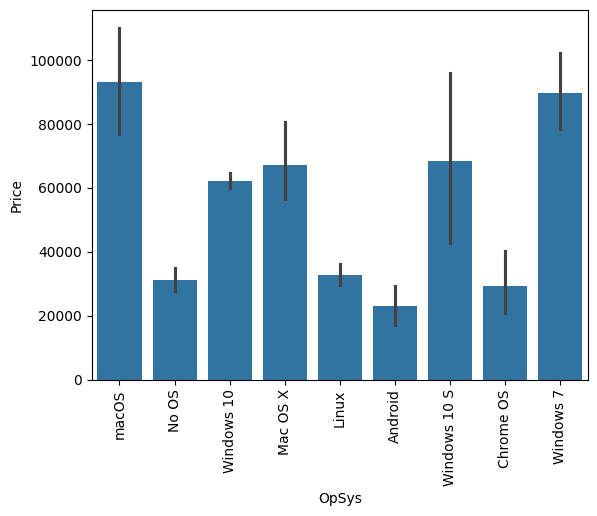

In [79]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [80]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [81]:
df['os'] = df['OpSys'].apply(cat_os)

In [82]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,Ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel,Mac


In [83]:
df.drop(columns=['OpSys'],inplace=True)

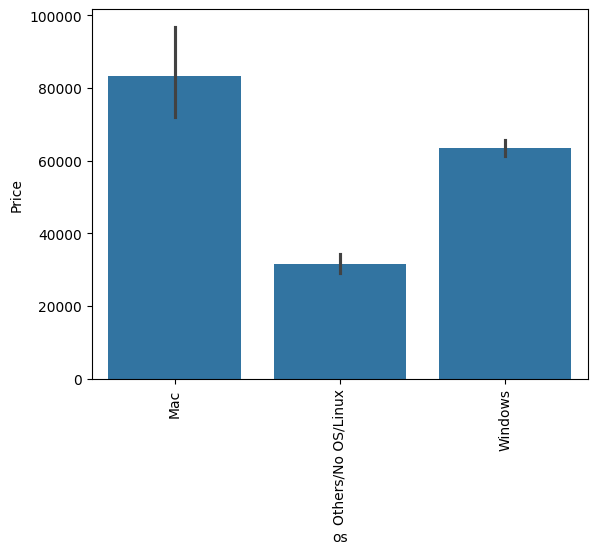

In [84]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

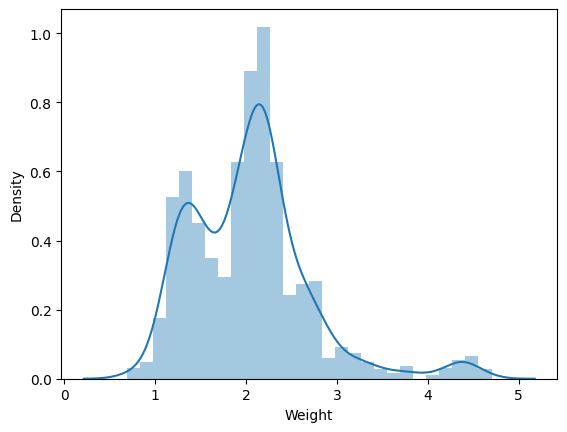

In [85]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

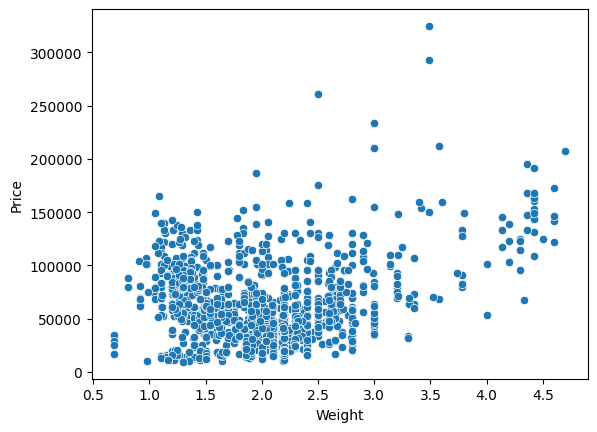

In [86]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [87]:
df.corr(numeric_only=True)['Price']

Inches         0.067329
Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
x_res          0.557369
y_res          0.554591
Ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

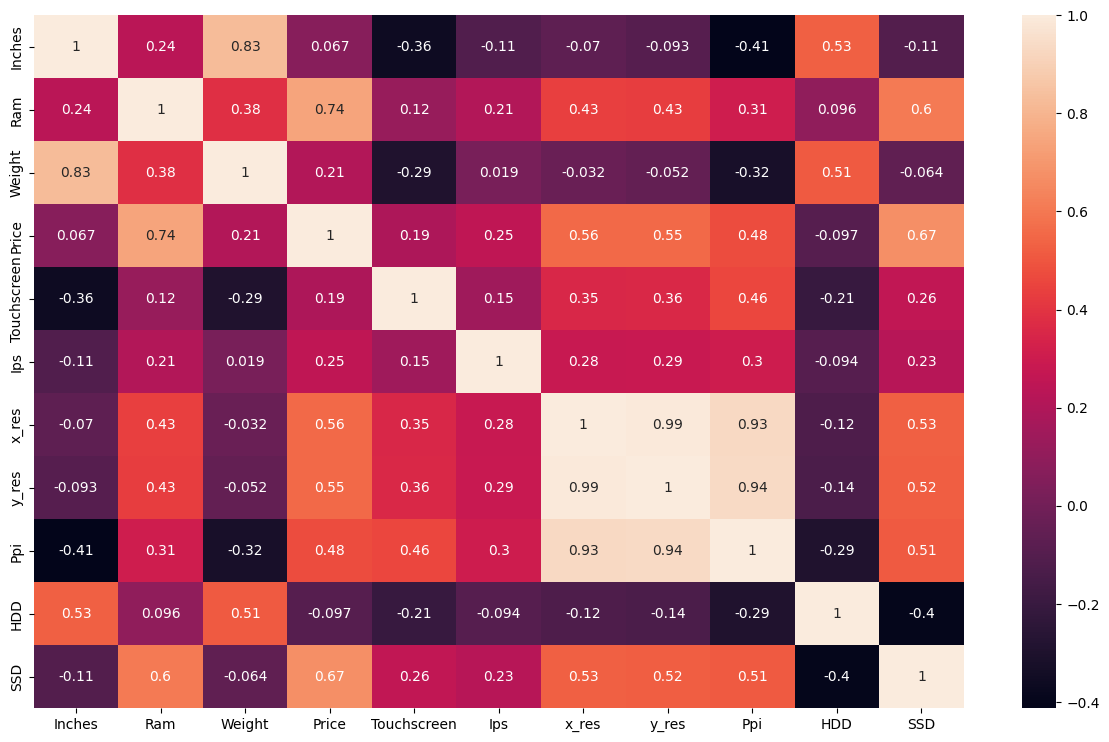

In [88]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Price', ylabel='Density'>

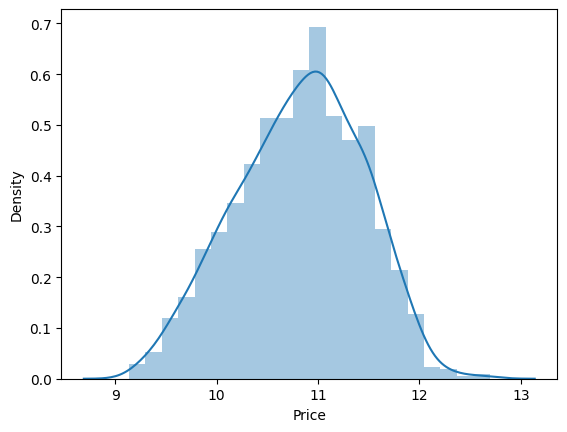

In [89]:
sns.distplot(np.log(df['Price']))

In [90]:
df['Total Storage'] = df['HDD'] + df['SSD']

In [91]:
df.sample(10)

,Company,TypeName,Inches,Ram,Weight,Price,Touchscreen,Ips,x_res,y_res,Ppi,Cpu brand,HDD,SSD,Gpu brand,os,Total Storage
1199,MSI,Gaming,17.3,16,2.43,109165.392,0,0,1920,1080,127.335675,Intel Core i7,1000,256,Nvidia,Windows,1256
560,Acer,2 in 1 Convertible,11.6,4,1.25,18594.720,1,1,1920,1080,189.905791,Other Intel Processor,0,0,Intel,Windows,0
1066,Asus,Gaming,17.3,64,3.58,211788.000,0,1,1920,1080,127.335675,Intel Core i7,0,1000,Nvidia,Windows,1000
741,Dell,Notebook,15.6,8,2.00,35431.200,0,0,1366,768,100.454670,Intel Core i3,0,256,Intel,Windows,256
334,Asus,Gaming,15.6,8,2.50,53226.720,0,0,1920,1080,141.211998,Intel Core i7,0,256,Nvidia,Windows,256
1121,HP,Notebook,13.3,8,1.16,90043.200,0,0,1920,1080,165.632118,Intel Core i5,0,256,Intel,Windows,256
1151,HP,Notebook,15.6,4,1.86,15824.160,0,0,1366,768,100.454670,AMD Processor,500,0,AMD,Windows,500
298,Lenovo,Notebook,15.6,6,2.40,26586.720,0,0,1920,1080,141.211998,AMD Processor,1000,0,AMD,Windows,1000
959,Acer,2 in 1 Convertible,11.6,4,1.25,20725.920,1,1,1366,768,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux,0
584,Dell,Netbook,11.6,4,1.26,15717.600,0,0,1366,768,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux,0


In [92]:
# df.to_csv('Laptop_Processed_Data')

In [93]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [95]:
X

,Company,TypeName,Inches,Ram,Weight,Touchscreen,Ips,x_res,y_res,Ppi,Cpu brand,HDD,SSD,Gpu brand,os,Total Storage
0,Apple,Ultrabook,13.3,8,1.37,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel,Mac,128
1,Apple,Ultrabook,13.3,8,1.34,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel,Mac,0
2,HP,Notebook,15.6,8,1.86,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux,256
3,Apple,Ultrabook,15.4,16,1.83,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD,Mac,512
4,Apple,Ultrabook,13.3,8,1.37,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel,Mac,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.80,1,1,1920,1080,157.350512,Intel Core i7,0,128,Intel,Windows,128
1299,Lenovo,2 in 1 Convertible,13.3,16,1.30,1,1,3200,1800,276.053530,Intel Core i7,0,512,Intel,Windows,512
1300,Lenovo,Notebook,14.0,2,1.50,0,0,1366,768,111.935204,Other Intel Processor,0,0,Intel,Windows,0
1301,HP,Notebook,15.6,6,2.19,0,0,1366,768,100.454670,Intel Core i7,1000,0,AMD,Windows,1000


In [96]:
train_r2= []
test_r2 = []
name = []
mae = []

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🎯 Model Creation and Evaluation. ✨</b></div>

# LinearRegression

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('Linear Regression')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.8083034719143773
MAE 0.2082790612070869
Train R2: 0.8347580082858135


# Ridge Regressor

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('Ridge')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.8116171855172409
MAE 0.20882966641202688
Train R2: 0.8257343544056263


# Lasso Regression

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('Lasso')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.8086386401022954
MAE 0.20958486334812648
Train R2: 0.8264710380142214


# Knn

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('KNN')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.8058935700074124
MAE 0.19472653407084964
Train R2: 0.8983177255032995


# Decison Tree

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('DT')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.8555006328565649
MAE 0.17859322780261971
Train R2: 0.9202821551440116


# SVM

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)


print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('SVM')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.7953115401199007
MAE 0.21792036351232177
Train R2: 0.8298964839776222


# Random Forest

In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
    oob_score=True
)


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('Random Forest')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.886706314369596
MAE 0.16475619827882051
Train R2: 0.9268164964090251


# Extra Tree Regressor

In [106]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,bootstrap=True,oob_score=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('Extra Tree')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.890561340687903
MAE 0.15757802907299084
Train R2: 0.9485341293927924


# Ada Boost

In [107]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=50,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('Ada boost')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.7989247275425458
MAE 0.2261667803910613
Train R2: 0.8129046271890127


# Gradient Boost

In [108]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=3,
    subsample=0.8,
    random_state=42
)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('GBDT')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.9023814286154012
MAE 0.14657582125000396
Train R2: 0.9511810145230238


# XgBoost

In [113]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1.0,
    objective='reg:squarederror',
    random_state=42
)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('XGB')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.8906776678011297
MAE 0.15569664310538497
Train R2: 0.9316113284071819


# Light Gradient Boosting

In [73]:
# !pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 7.6 MB/s  0:00:00


In [110]:
from lightgbm import LGBMRegressor

In [115]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

step2 = LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.02,
    num_leaves=31,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    verbose=-1,

)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('Light GB')
mae.append(mean_absolute_error(y_test,y_pred))
print("Train R2:", r2_score(y_train, y_pred_train))


R2 score 0.907382126802193
MAE 0.14418769648756444
Train R2: 0.9711218918040594


# Cat Boost 

In [89]:
# !pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 1.0/102.5 MB 10.1 MB/s eta 0:00:11
   - -------------------------------------- 3.1/102.5 MB 10.2 MB/s eta 0:00:10
   -- ------------------------------------- 5.5/102.5 MB 10.2 MB/s eta 0:00:10
   -- ------------------------------------- 7.6/102.5 MB 10.2 MB/s eta 0:00:10
   --- ------------------------------------ 10.0/102.5 MB 10.2 MB/s eta 0:00:10
   ---- ----------------------------------- 12.3/102.5 MB 10.3 MB/s eta 0:00:09
   ----- ---------------------------------- 14.7/102.5 MB 10.4 MB/s eta 0:00:09
   ------ --------------------------------- 17.3/102.5 MB 10.6 MB/s eta 0:00:09
   ------- -------------------------------- 19.7/102.5 MB 10.6 MB/s eta 0:00:08
   -------- ------------------------------- 22.0/102.5 MB 10.7 MB/s eta 0:00:08
   --------- ------------------------------ 24.4/102.5 MB 10.8 MB/s eta 0:00:08
   ---------- ----------------------------- 27.0/102.

In [112]:
from catboost import CatBoostRegressor

cat_features = [0,1,10,13,14]

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    loss_function='RMSE',
    random_state=42,
    verbose=0
)

model.fit(
    X_train,
    y_train,
    cat_features=cat_features
)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2 score training:', r2_score(y_train, y_pred_train))

train_r2.append(r2_score(y_train,y_pred_train))
test_r2.append(r2_score(y_test,y_pred))
name.append('Cat Boost')
mae.append(mean_absolute_error(y_test,y_pred))

R2 score: 0.8973784596511455
MAE: 0.15135463802715735
R2 score training: 0.9435819305436887


In [122]:
Performance = pd.DataFrame({
    "Model": name,
    "Train R2": train_r2,
    "Test R2": test_r2,
    "MAE": mae
})

per = Performance.sort_values(by="Test R2", ascending=False)
per = per.drop_duplicates()
per


,Model,Train R2,Test R2,MAE
15,Light GB,0.971122,0.907382,0.144188
12,Light GB,0.958255,0.906336,0.145014
10,GBDT,0.951181,0.902381,0.146576
13,Cat Boost,0.943582,0.897378,0.151355
14,XGB,0.931611,0.890678,0.155697
8,Extra Tree,0.948534,0.890561,0.157578
7,Random Forest,0.926816,0.886706,0.164756
5,DT,0.920282,0.855501,0.178593
2,Ridge,0.825734,0.811617,0.208830
3,Lasso,0.826471,0.808639,0.209585


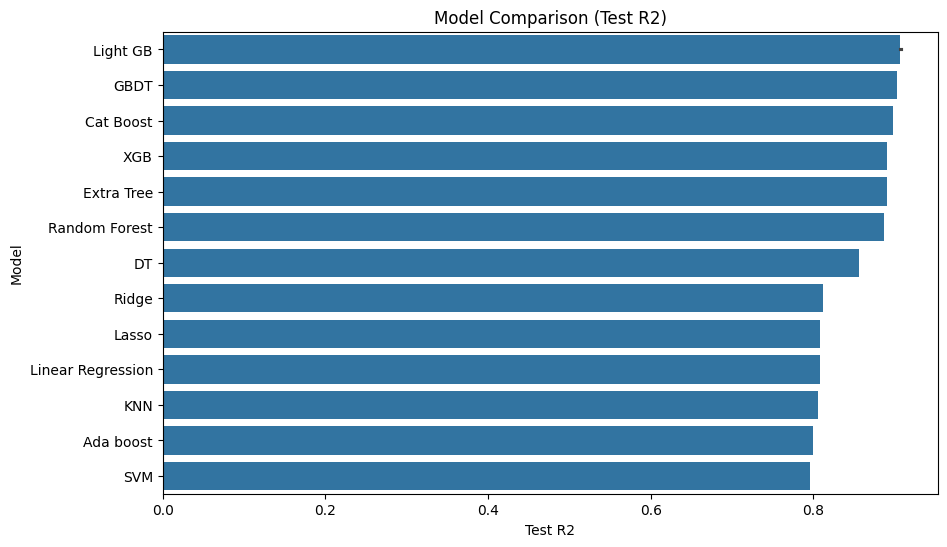

In [127]:
plt.figure(figsize=(10,6))
sns.barplot(data=per, y='Model', x='Test R2')
plt.title("Model Comparison (Test R2)")
plt.show()

# Voting Ensemble

In [128]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [133]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,10,13,14])
],remainder='passthrough')

lightgb = LGBMRegressor(verbose=-1,n_estimators=1500,learning_rate=0.02,num_leaves=31,max_depth=-1,min_child_samples=20,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.1,reg_lambda=1.0, random_state=42)
gbdt = GradientBoostingRegressor(n_estimators=800,learning_rate=0.03,max_depth=4,min_samples_split=5,min_samples_leaf=3,subsample=0.8,random_state=42)
cat = CatBoostRegressor(iterations=1500,learning_rate=0.02,depth=6,loss_function='RMSE',random_state=42,verbose=0)
rf = RandomForestRegressor(n_estimators=500,max_depth=None,min_samples_split=5,min_samples_leaf=2,max_features='sqrt',bootstrap=True,n_jobs=-1,random_state=42,oob_score=True
)

step2 = VotingRegressor([('light GB', lightgb), ('gbdt', gbdt), ('cat boost',cat), ('rf',rf)],weights=[4,2,2,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('R2 score training:', r2_score(y_train, y_pred_train))


R2 score 0.9118251335438053
MAE 0.14157599010499644
R2 score training: 0.9664111109303539


# Stacking

In [130]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0,1,10,13,14])
], remainder='passthrough')

estimators = [
    ('lightgb', LGBMRegressor(
        verbose=-1,
        n_estimators=1500,
        learning_rate=0.02,
        num_leaves=31,
        max_depth=-1,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42
    )),
    
    ('gbdt', GradientBoostingRegressor(
        n_estimators=800,
        learning_rate=0.03,
        max_depth=4,
        min_samples_split=5,
        min_samples_leaf=3,
        subsample=0.8,
        random_state=42
    )),
    
    ('cat', CatBoostRegressor(
        iterations=1500,
        learning_rate=0.02,
        depth=6,
        loss_function='RMSE',
        random_state=42,
        verbose=0
    )),
    
    ('rf', RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ))
]

step2 = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(alpha=100)
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.9080946020440388
MAE: 0.14649251957627515


In [263]:
y_pred_train_stack = pipe.predict(X_train)

In [264]:
print('R2 score training:', r2_score(y_train, y_pred_train_stack))


R2 score training: 0.9578430090021142


# Exporting the Model 

In [169]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [1]:
!pip install shap


   ---------------------------------------- 0.0/547.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.0 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.0 kB ? eta -:--:--
   ---------------------------------------- 547.0/547.0 kB 1.3 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 1.9 MB/s eta 0:00:02
   --------------- ------------------------ 1.0/2.7 MB 2.1 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.7 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 3.3 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.6/38.1 MB 8.4 MB/s eta 0:00:05
   --- ------------------------------------ 2.9/38.1 MB 7.6 MB/s eta 0:00:05
   ---- ----------------------------------- 4

In [2]:
import shap


C:\Users\Jyoti\.conda\envs\streamlit_ds\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [104]:
explainer = shap.TreeExplainer(LGBMRegressor)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'type'>